In [1]:
# =========================================
# 1. Imports & Setup
# =========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Column names for German Credit dataset
column_names = [
    "Status_of_existing_checking_account", "Duration_in_month", "Credit_history",
    "Purpose", "Credit_amount", "Savings_account/bonds",
    "Present_employment_since", "Installment_rate_in_percentage_of_disposable_income",
    "Personal_status_and_sex", "Other_debtors/guarantors",
    "Present_residence_since", "Property", "Age_in_years",
    "Other_installment_plans", "Housing", "Number_of_existing_credits_at_this_bank",
    "Job", "Number_of_people_being_liable_to_provide_maintenance_for",
    "Telephone", "Foreign_worker", "Credit_risk"
]

# Load raw dataset (never modify this file)
df = pd.read_csv("german.data", sep=" ", header=None, names=column_names)

print("Shape:", df.shape)
df.head()

Shape: (1000, 21)


,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors/guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [2]:
# =========================================
# 2. Target Mapping & Basic Checks
# =========================================
# Map target: 1 = Good (0), 2 = Bad (1)
df["target"] = df["Credit_risk"].map({1:0, 2:1})

print("Target distribution:")
print(df["target"].value_counts(normalize=True))

# Check for missing values & special tokens
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nSpecial token check ('?'):")
print((df == "?").sum())

# Duplicate check
print("\nDuplicates:", df.duplicated().sum())

Target distribution:
target
0    0.7
1    0.3
Name: proportion, dtype: float64

Missing values per column:
Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account/bonds                                       0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors/guarantors                                    0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                  

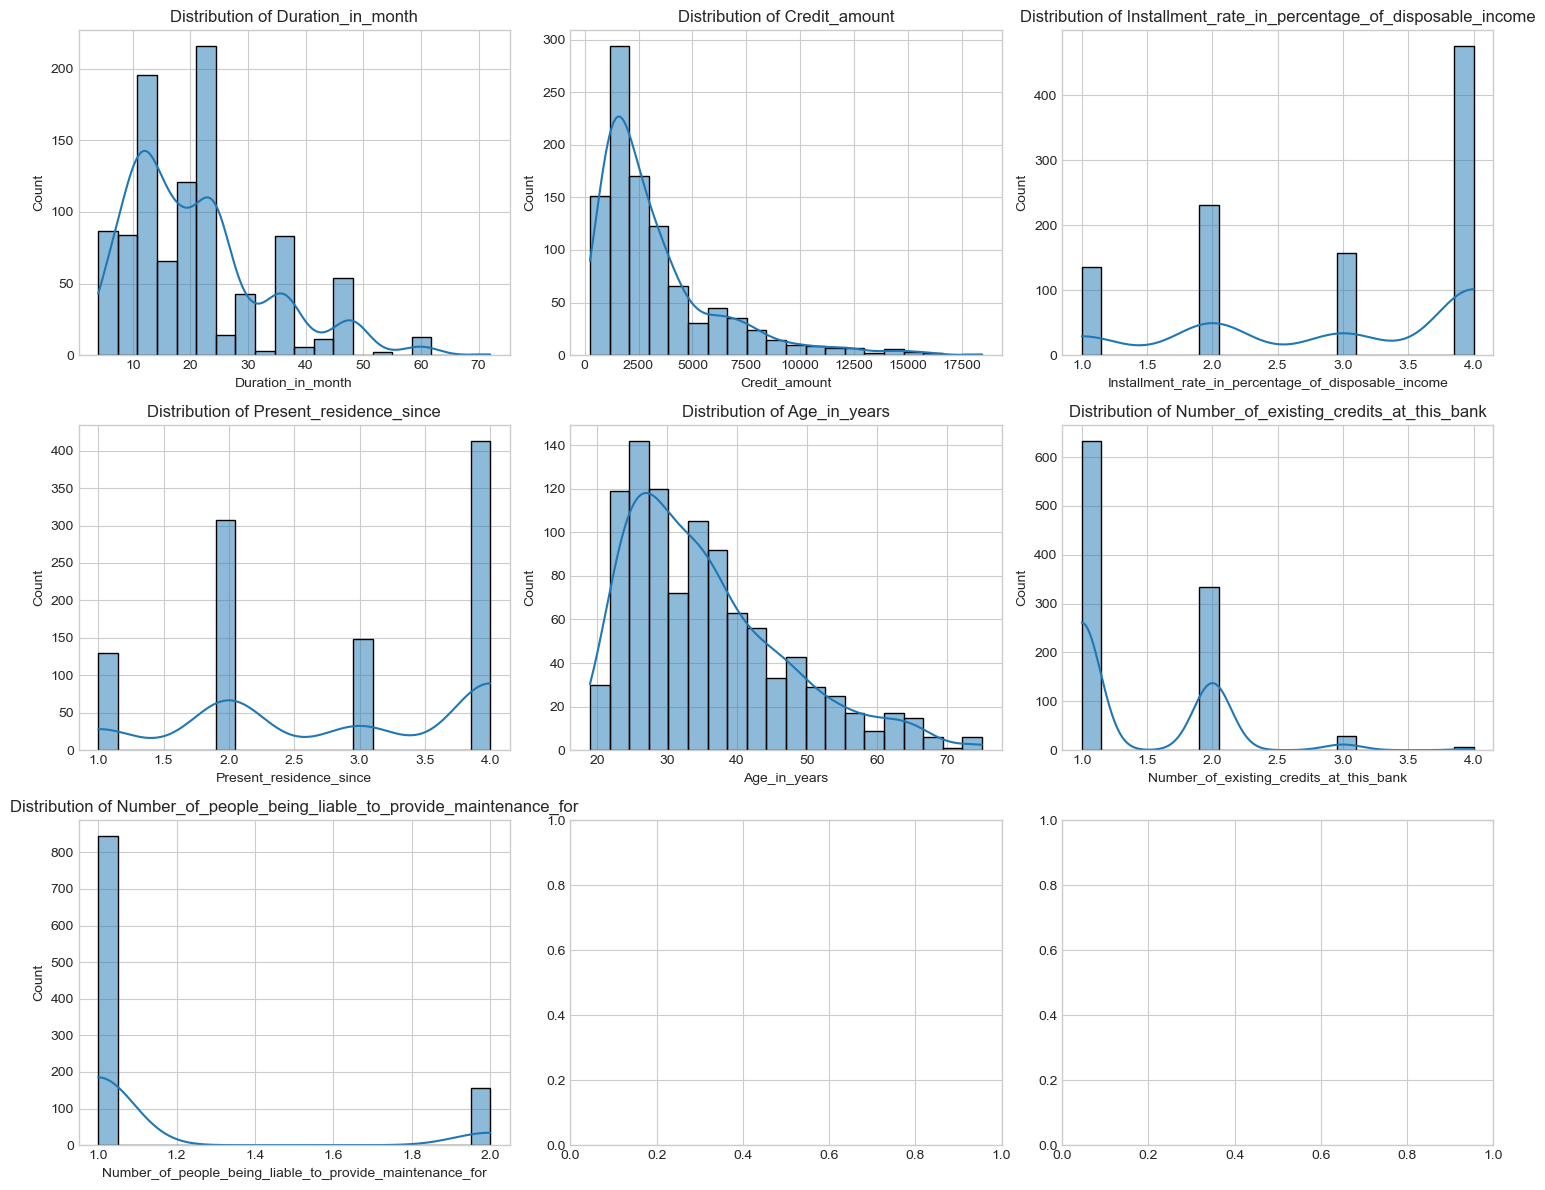


Status_of_existing_checking_account value counts:
Status_of_existing_checking_account
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64

Credit_history value counts:
Credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64

Purpose value counts:
Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

Savings_account/bonds value counts:
Savings_account/bonds
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64

Present_employment_since value counts:
Present_employment_since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64

Personal_status_and_sex value counts:
Personal_status_and_sex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64

Other_debtors/guarantors value counts:
Other_debtors/guarantors
A101    907
A103     52
A102     41
Name: count, dtype: 

In [3]:
# =========================================
# 3. Univariate Analysis
# =========================================
# Numerical columns
numerical_cols = [
    "Duration_in_month", "Credit_amount", "Installment_rate_in_percentage_of_disposable_income",
    "Present_residence_since", "Age_in_years",
    "Number_of_existing_credits_at_this_bank",
    "Number_of_people_being_liable_to_provide_maintenance_for"
]

df[numerical_cols].describe()

# Histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Categorical columns
categorical_cols = [
    "Status_of_existing_checking_account", "Credit_history", "Purpose",
    "Savings_account/bonds", "Present_employment_since",
    "Personal_status_and_sex", "Other_debtors/guarantors", "Property",
    "Other_installment_plans", "Housing", "Job", "Telephone", "Foreign_worker"
]

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

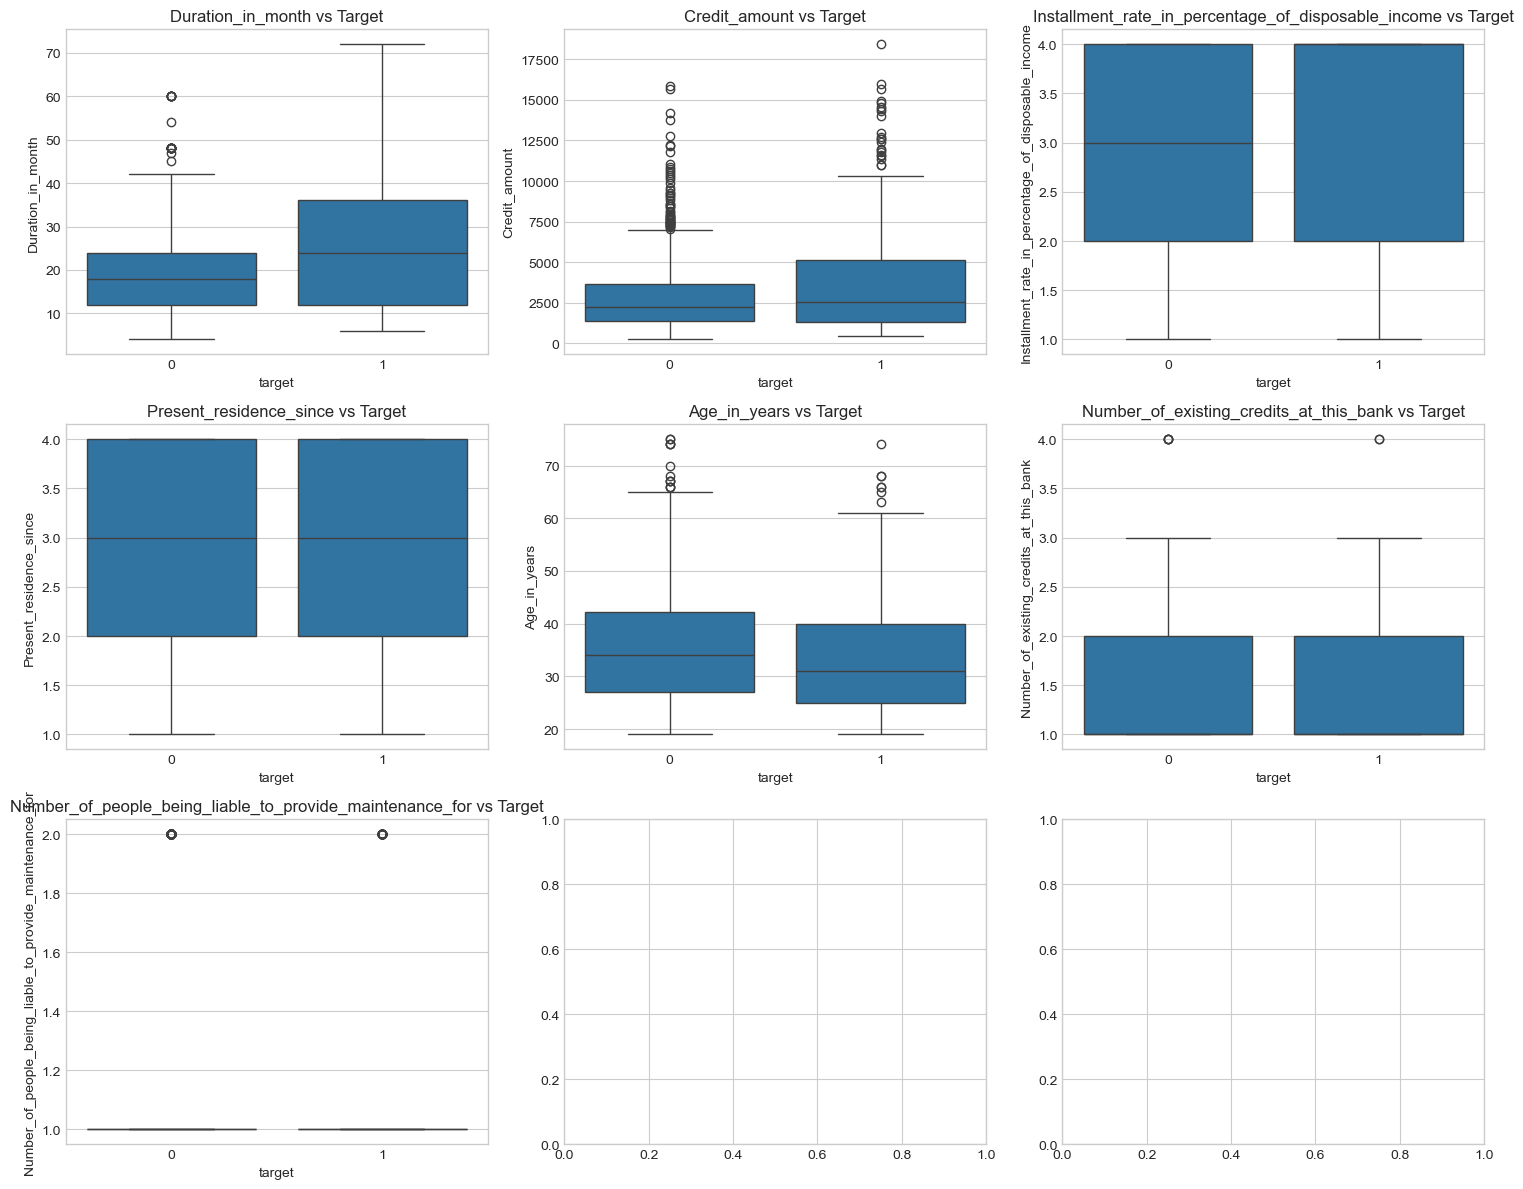

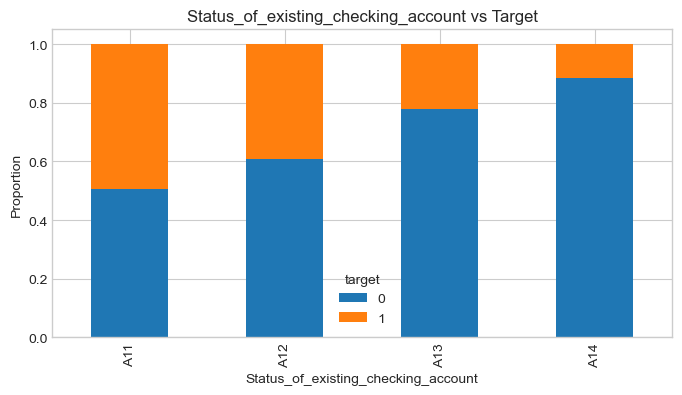

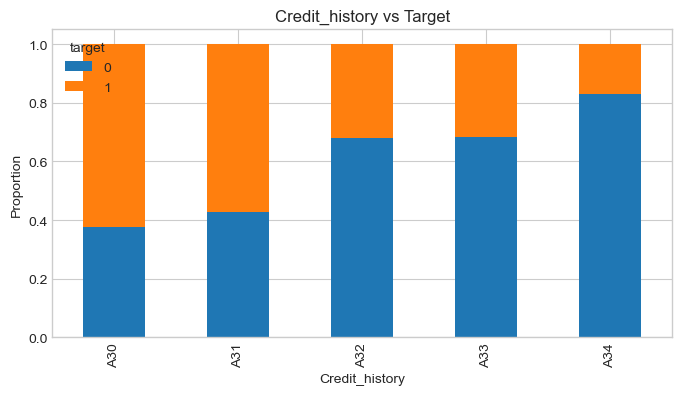

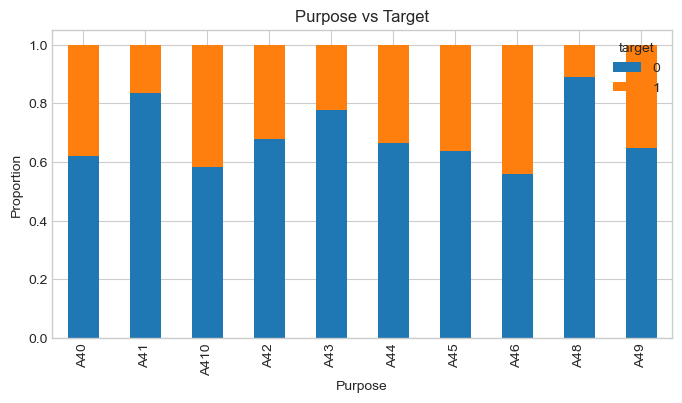

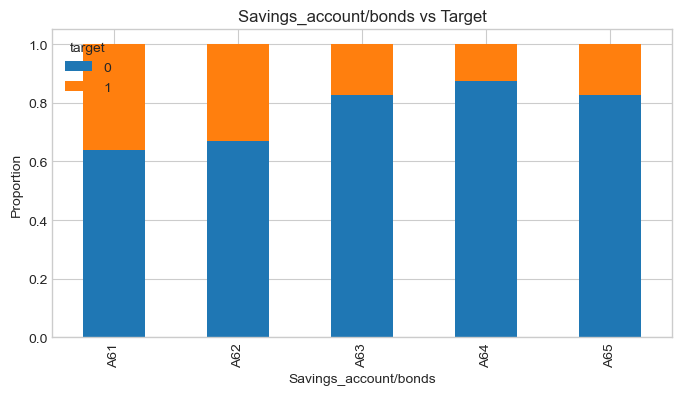

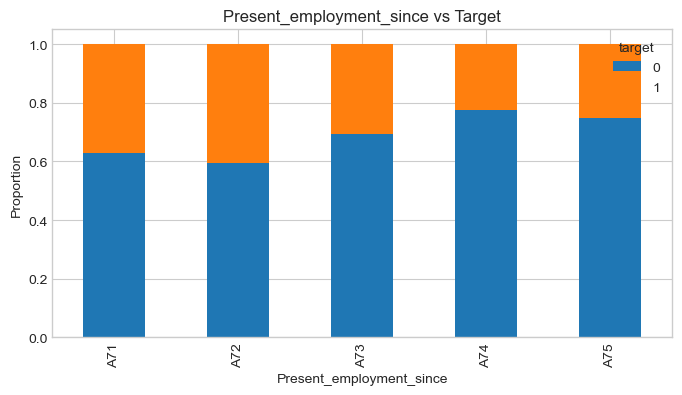

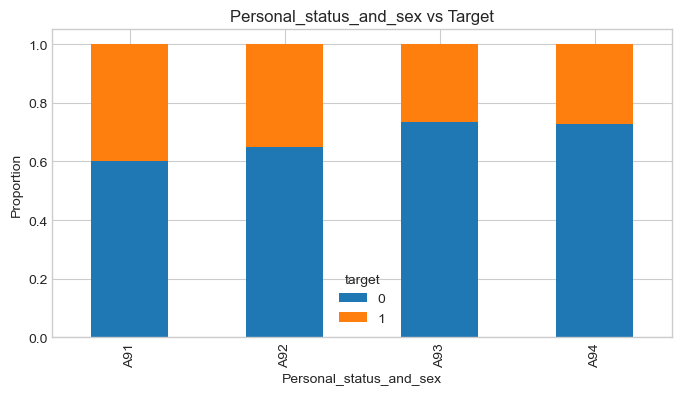

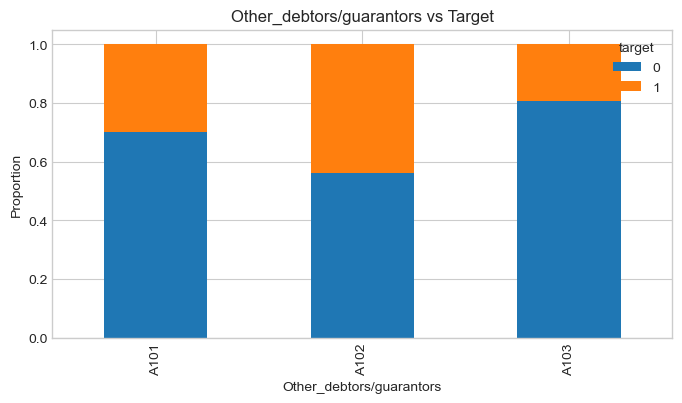

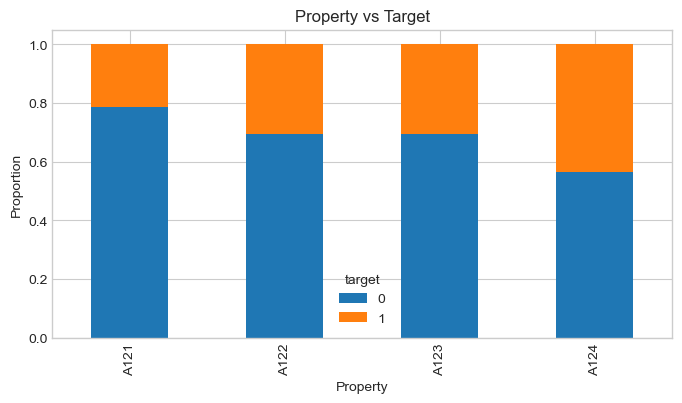

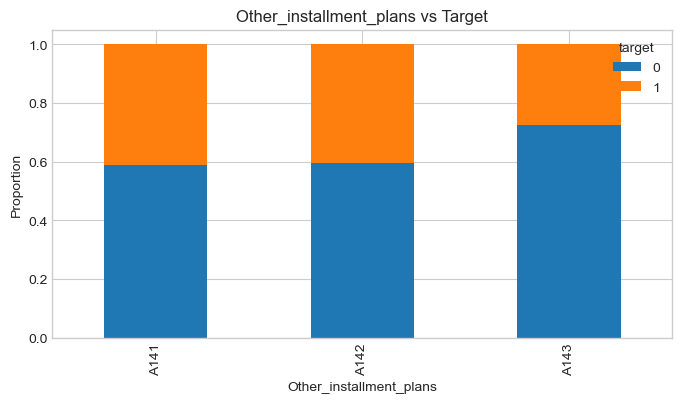

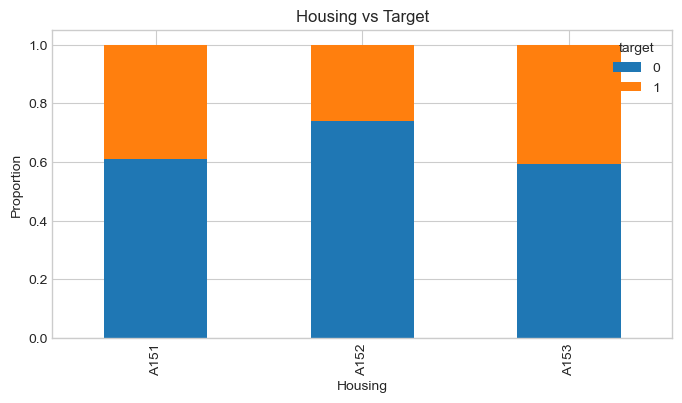

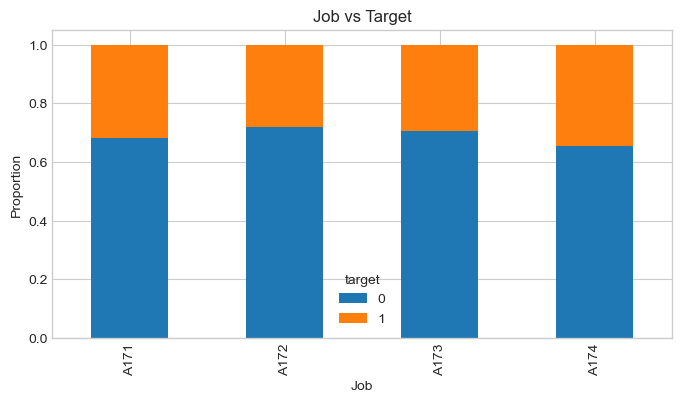

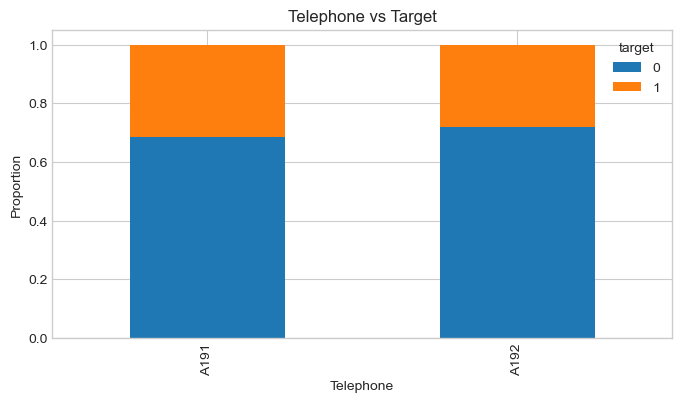

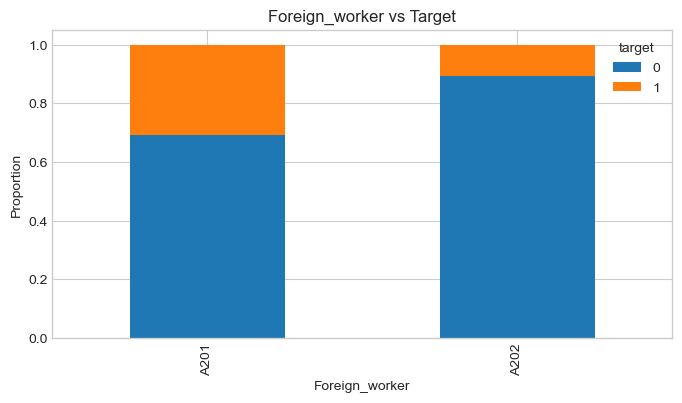

In [4]:
# =========================================
# 4. Bivariate Analysis
# =========================================
# Numeric vs Target
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="target", y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Target")
plt.tight_layout()
plt.show()

# Categorical vs Target (proportion of bad credit)
for col in categorical_cols:
    cross_tab = pd.crosstab(df[col], df["target"], normalize="index")
    cross_tab.plot(kind="bar", stacked=True, figsize=(8,4), title=f"{col} vs Target")
    plt.ylabel("Proportion")
    plt.show()

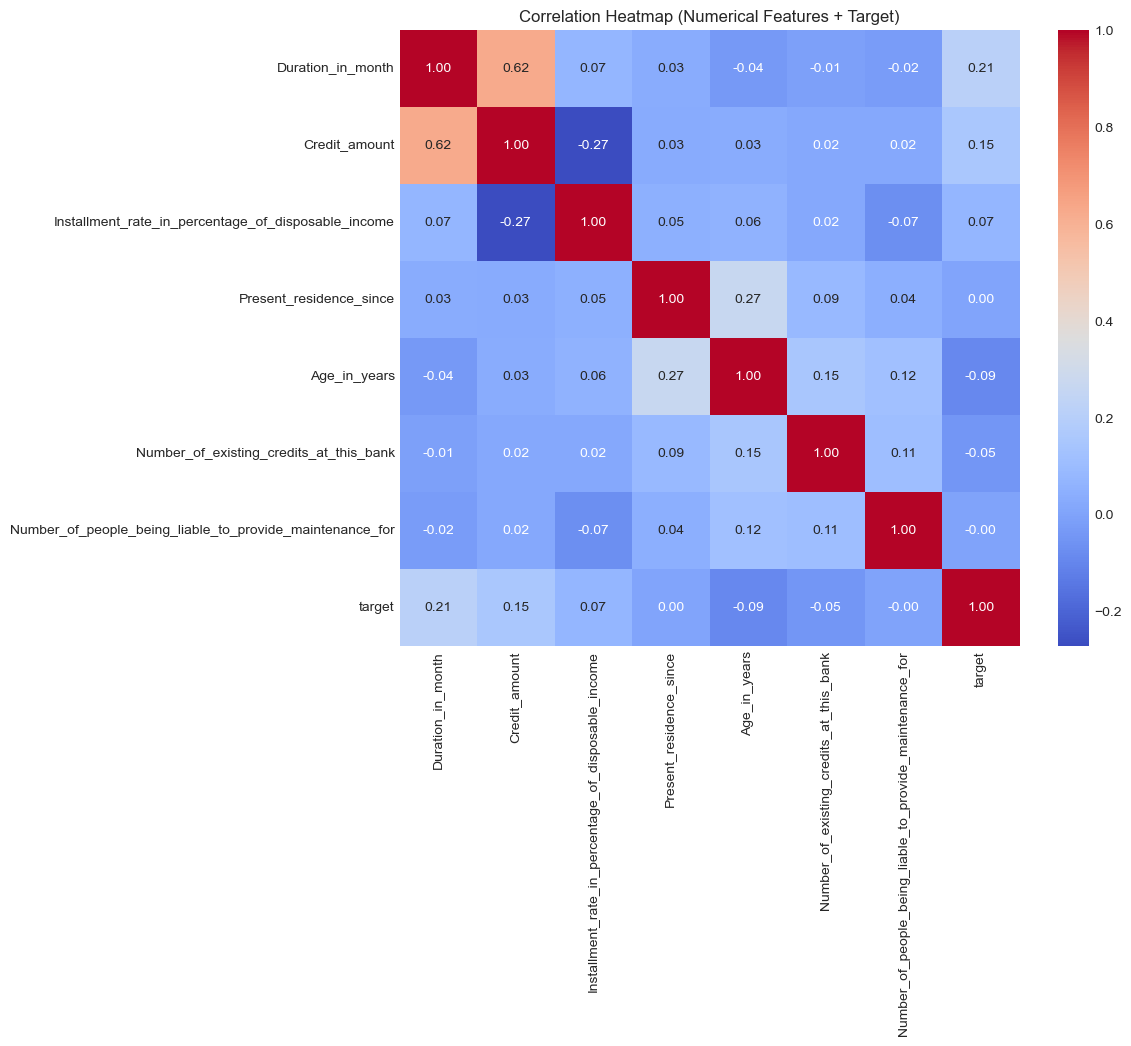

In [5]:
# =========================================
# 5. Correlation Analysis
# =========================================
corr = df[numerical_cols + ["target"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features + Target)")
plt.show()

In [6]:
# =========================================
# 6. Feature Engineering & Preprocessing
# =========================================
import numpy as np
import pandas as pd

print("--- Starting Feature Engineering ---")

# 1. Create New Features based on EDA insights
# Create ratio features that might capture more complex relationships.
# We use .replace() as a safeguard against division by zero.
df['credit_per_month'] = df['Credit_amount'] / df['Duration_in_month'].replace(0, np.nan)
df['credit_to_age'] = df['Credit_amount'] / df['Age_in_years'].replace(0, np.nan)

# 2. Transform Skewed Features
# We observed that Credit_amount and Duration_in_month were right-skewed.
# A log transform can help normalize their distribution for some models.
df['log_credit_amount'] = np.log1p(df['Credit_amount'])
df['log_duration_in_month'] = np.log1p(df['Duration_in_month'])


# 3. Bin Age to handle non-linear relationships
# We saw age had some effect, but binning it can help linear models capture that pattern better.
df['age_bin'] = pd.cut(df['Age_in_years'],
                       bins=[18, 25, 35, 45, 55, 65, 100],
                       labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'],
                       right=False) # 'right=False' makes bins [18, 25) etc.

# 4. Feature Selection: Drop weak and redundant columns
# Based on our final EDA conclusion, these features had little to no predictive power.
features_to_drop = [
    'Telephone',
    'Foreign_worker',
    'Number_of_people_being_liable_to_provide_maintenance_for',
    'Installment_rate_in_percentage_of_disposable_income',
    'Present_residence_since',
    'Number_of_existing_credits_at_this_bank',
    'Credit_risk' # Original target column, replaced by 'target'
]

# Drop the columns from the DataFrame
df_engineered = df.drop(columns=features_to_drop, errors='ignore')


# 5. Final Inspection
# Check the results of our engineering steps.
print("\nFeature engineering complete.")
print(f"Original shape: {df.shape} -> New shape: {df_engineered.shape}")
print("\nFirst 5 rows of the new engineered DataFrame:")
df_engineered.head()

--- Starting Feature Engineering ---

Feature engineering complete.
Original shape: (1000, 27) -> New shape: (1000, 20)

First 5 rows of the new engineered DataFrame:


,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account/bonds,Present_employment_since,Personal_status_and_sex,Other_debtors/guarantors,Property,Age_in_years,Other_installment_plans,Housing,Job,target,credit_per_month,credit_to_age,log_credit_amount,log_duration_in_month,age_bin
0,A11,6,A34,A43,1169,A65,A75,A93,A101,A121,67,A143,A152,A173,0,194.833333,17.447761,7.064759,1.945910,65+
1,A12,48,A32,A43,5951,A61,A73,A92,A101,A121,22,A143,A152,A173,1,123.979167,270.500000,8.691483,3.891820,18-25
2,A14,12,A34,A46,2096,A61,A74,A93,A101,A121,49,A143,A152,A172,0,174.666667,42.775510,7.648263,2.564949,46-55
3,A11,42,A32,A42,7882,A61,A74,A93,A103,A122,45,A143,A153,A173,0,187.666667,175.155556,8.972464,3.761200,46-55
4,A11,24,A33,A40,4870,A61,A73,A93,A101,A124,53,A143,A153,A173,1,202.916667,91.886792,8.491055,3.218876,46-55
